In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.pylab as pylab
import numpy as np

from ipynb.fs.full.UtilCollections import SEASONS, POSITIONS, PARAMS
from ipynb.fs.full.UtilFunctions import format_season

In [2]:
pylab.rcParams.update(PARAMS)

In [3]:
def get_player_df_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))

    return player_df

In [4]:
player_dfs = []

for season in SEASONS:
    player_dfs.append(get_player_df_by_season(season))

In [5]:
avg_salaries_per_pos= {pos:[] for pos in POSITIONS}

for i in range(len(SEASONS)):
    avg_salaries = player_dfs[i].sort_values(by=['G'], ascending=False)
    avg_salaries = avg_salaries[avg_salaries["Tm"] != "TOT"].drop_duplicates(subset ="Player",keep="first").groupby(['Pos']).mean()['Salary']
    for index, value in avg_salaries.items():
        if index in POSITIONS:
            avg_salaries_per_pos[index].append(round(value, 2))

In [6]:
top_50_salaries_per_season= {pos:[] for pos in POSITIONS}

for i in range(len(SEASONS)-1):
    top_50_salaries = player_dfs[i].sort_values(by=['G'], ascending=False)
    top_50_salaries = top_50_salaries[top_50_salaries["Tm"] != "TOT"].drop_duplicates(subset="Player",keep="first").sort_values(by=['Salary'], ascending=False)
    top_50_salaries = top_50_salaries[:50].groupby(['Pos']).size()
    for index, value in top_50_salaries.items():
        if index in POSITIONS:
            top_50_salaries_per_season[index].append(value)

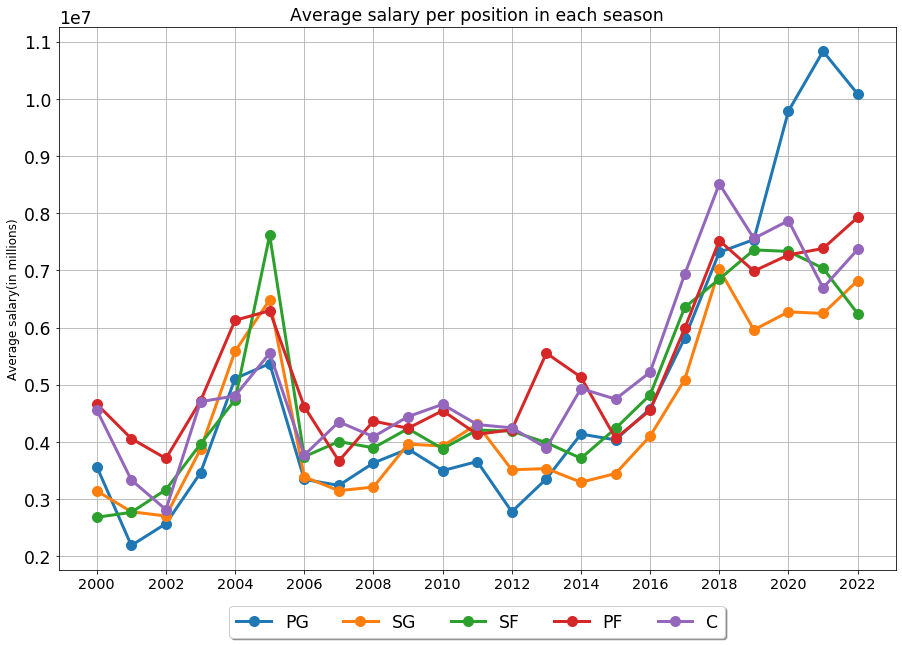

In [7]:
plt.figure(figsize=(15,10))

plt.grid()
for position in POSITIONS:
    plt.plot(SEASONS, avg_salaries_per_pos[position], lw=3, label=position, marker='o', ms=10)
    
plt.title("Average salary per position in each season")
plt.xticks(SEASONS[::2])
plt.yticks(range(2*10**6, 11*10**6+1, 10**6))
plt.ylabel("Average salary(in millions)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

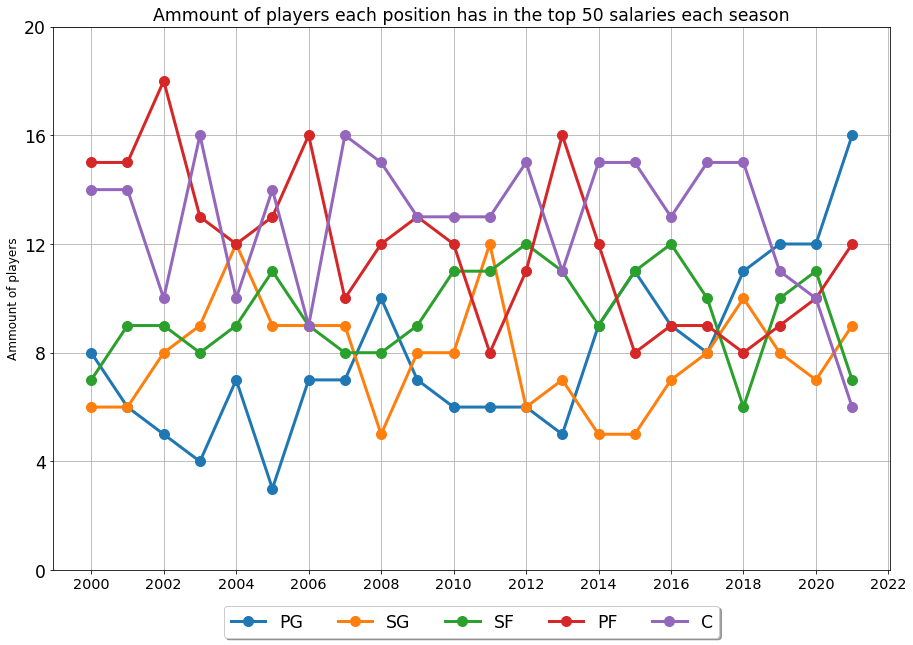

In [8]:
plt.figure(figsize=(15,10))

for position in POSITIONS:
    plt.plot(range(2000, 2022), top_50_salaries_per_season[position], label=position, lw=3, marker='o', ms=10)
    
plt.grid()
plt.xticks(SEASONS[::2])
plt.yticks(range(0,21,4))
plt.ylabel("Ammount of players")
plt.title("Ammount of players each position has in the top 50 salaries each season")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()